In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
import seaborn as sns

In [9]:
df = pd.read_csv('data.csv') #loading the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


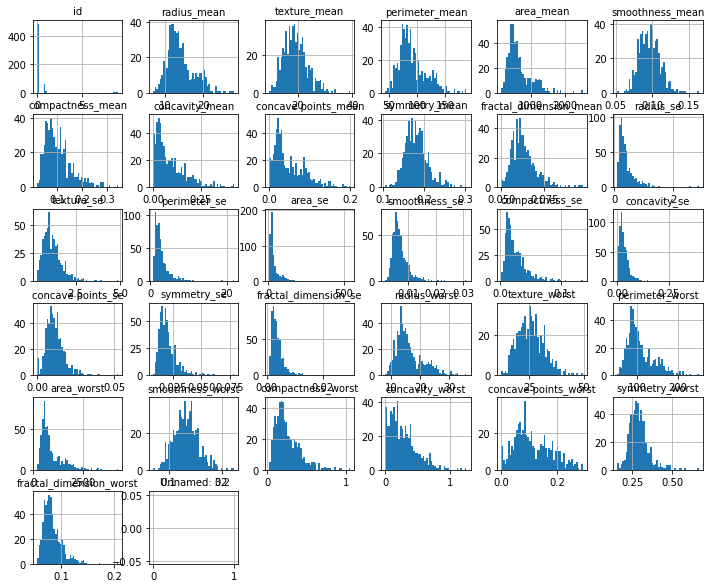

In [12]:
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 10))

plt.show()


In [6]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True) #remove unecessary values

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df["diagnosis"].replace({"M": 1, "B": 0}, inplace=True) #Replace M, B for 1 and 0 respectively

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42) #split our data: 80% training, 20% testing

In [11]:
prediction_vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
#hold the list of all of the features we want to use *in this case all of them as this is my first ML project*

In [12]:
#Train Data
train_x = train[prediction_vars]
train_y = train['diagnosis']

#Test Data
test_x = test[prediction_vars]
test_y = test['diagnosis']


In [13]:
# Logistic/Sigmoid Model's Algorithm σ(z) = 1/1+e^-z
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
sigmoid(train_x)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0.999880,1.000000,1.0,1.0,0.526625,0.535266,0.577617,0.510936,0.552580,0.520104,...,0.999967,1.0,1.0,1.0,0.536982,0.607425,0.777646,0.543639,0.604153,0.529341
181,1.000000,1.000000,1.0,1.0,0.528494,0.570331,0.561857,0.537330,0.559590,0.518487,...,1.000000,1.0,1.0,1.0,0.537206,0.681006,0.663292,0.572070,0.601040,0.532056
63,0.999896,0.999999,1.0,1.0,0.519293,0.521864,0.514966,0.505450,0.558259,0.517400,...,0.999955,1.0,1.0,1.0,0.524570,0.541852,0.534868,0.512715,0.581321,0.521212
248,0.999976,1.000000,1.0,1.0,0.524124,0.518077,0.505947,0.504037,0.547283,0.515817,...,0.999995,1.0,1.0,1.0,0.537405,0.534893,0.528095,0.515335,0.584409,0.520356
60,0.999962,1.000000,1.0,1.0,0.528320,0.520142,0.502710,0.503225,0.568148,0.517393,...,0.999984,1.0,1.0,1.0,0.531832,0.524645,0.505420,0.506447,0.587999,0.520039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.999862,1.000000,1.0,1.0,0.524438,0.538200,0.521502,0.507180,0.547407,0.522435,...,0.999941,1.0,1.0,1.0,0.530138,0.560601,0.535789,0.511963,0.556113,0.527073
106,0.999991,1.000000,1.0,1.0,0.528519,0.525403,0.517668,0.508712,0.544904,0.516294,...,0.999998,1.0,1.0,1.0,0.542100,0.566111,0.571335,0.530412,0.569693,0.522727
270,0.999999,1.000000,1.0,1.0,0.516067,0.506687,0.501812,0.501562,0.537629,0.513437,...,1.000000,1.0,1.0,1.0,0.521404,0.512587,0.509664,0.508332,0.561142,0.515295
435,0.999999,1.000000,1.0,1.0,0.526475,0.528295,0.528120,0.516152,0.541628,0.516354,...,1.000000,1.0,1.0,1.0,0.540238,0.588266,0.600344,0.545548,0.578812,0.526351


In [15]:
def compute_cost(X, y, w, b):
  
    # convert pandas dataframe to numpy arrays
    array_x = X.values
    array_y = y.values
    m, n = array_x.shape

    z_wb = np.dot(array_x, w) + b # vectorized dot product
    f_wb = sigmoid(z_wb)
    f_wb = np.clip(f_wb, 1e-10, 1-1e-10)
    loss = -array_y * np.log(f_wb) - (1-array_y)* np.log(1 - f_wb)
    total_cost = (1 / m) * np.sum(loss)  
    return total_cost

In [16]:
m, n = train_x.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

#Debugging and testing
try:
    cost = compute_cost(train_x, train_y, initial_w, initial_b)
    print(f'Cost at initial w: {cost}')
except Exception as e:
    print(f'Error: {e}')

Cost at initial w: 0.6931471805599453


In [17]:
#Calculate the gradients of w and b
def gradient(X, y, w, b,):
    
    array_x = X.values
    array_y = y.values
    m, n = array_x.shape

    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range (m):
        
        z_wb = 0
        
        for j in range(n):
            
            z_wb_ij = w[j] * array_x[i,j]
            z_wb += z_wb_ij
            
        z_wb += b
        f_wb = sigmoid(z_wb)


        dj_db += (f_wb - array_y[i])

        for j in range(n):
            
            dj_dw_ij = (f_wb - array_y[i]) * array_x[i,j]
            dj_dw[j] += dj_dw_ij
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw
    

In [18]:
#Test if the gradient calculator worked!
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = gradient(train_x, train_y, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.12857142857142856
dj_dw at initial w (zeros):[0.5896747252747254, 1.6096593406593436, 3.2220219780219788, -34.95912087912088, 0.009789021978021983, -0.0016333956043956056, -0.01477716923076924, -0.008086526373626375, 0.018665604395604406, 0.008118516483516483, -0.022130769230769246, 0.15547461538461538, -0.1615524175824175, -6.636438461538464, 0.0009843505494505492, 0.0010115747252747258, 0.0008681658241758251, 0.00037409560439560427, 0.002626538461538461, 0.0004350695604395604, 0.30735384615384637, 1.91468131868132, 1.2863736263736278, -85.30538461538463, 0.012116637362637368, -0.01156406593406593, -0.030383770329670344, -0.010192976923076925, 0.02392912087912089, 0.008086758241758252]


In [19]:
import math
def grad_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J 


In [20]:
np.random.seed(1)
intial_w = np.zeros(n)
initial_b = 0


# Some gradient descent settings
iterations = 10000
alpha = 0.00001

w,b, J_history,_ = grad_descent(train_x ,train_y, initial_w, initial_b, compute_cost, gradient, alpha, iterations)

Iteration    0: Cost     0.75   
Iteration 1000: Cost     0.27   
Iteration 2000: Cost     0.24   
Iteration 3000: Cost     0.24   
Iteration 4000: Cost     0.23   
Iteration 5000: Cost     0.23   
Iteration 6000: Cost     0.22   
Iteration 7000: Cost     0.22   
Iteration 8000: Cost     0.22   
Iteration 9000: Cost     0.22   
Iteration 9999: Cost     0.22   


In [21]:
def predict(X, w, b): 

    m, n = X.shape   
    p = np.zeros(m)


    # Loop over each example
    for i in range(m):
        z_wb = 0
        
        for j in range(n): 
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
        
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
    return p

In [24]:
#Compute accuracy on our training set and check all the metrics to maximize the model in generalization by tuning the threshold for 0 and 1
#Make the test data into a np array for the computation to work
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score

# test_x = test_x.values turn into np array
# test_y = test_y.values turn into np array

y_pred = predict(test_x, w, b)
print(f'Accuracy: {accuracy_score(test_y, y_pred)}')
print(f"F-1 Score: {f1_score(test_y, y_pred)}")
print(f"AUC Score: {roc_auc_score(test_y, y_pred)}")

#Confusion Matrix
print(confusion_matrix(test_y, y_pred))

#Precision and Recall
print(f"Precision: {precision_score(test_y, y_pred)}") # 71/71 + 0
print(f"Recall: {recall_score(test_y, y_pred)}") # 40/40 + 3

Accuracy: 0.9736842105263158
F-1 Score: 0.963855421686747
AUC Score: 0.9651162790697674
[[71  0]
 [ 3 40]]
Precision: 1.0
Recall: 0.9302325581395349
